# Predicting customer churn using a telecommunications dataset

- This project is valuable for businesses and involves classification techniques.

## 1. Importing necessary libraries

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 2. Data Exploration

#### Loading Dataset

In [77]:
df = pd.read_csv("churndata.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Performing Initial Exploration

In [78]:
df.shape

(7043, 21)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### categorical columns that needs to be converted into numerical

In [80]:
# gender
# partners
# Dependents
# PhoneService
# MultipleLines
# InternetService
# OnlineSecurity
# OnlineBackup
# DeviceProtection
# TechSupport
# StreamingTV
# StreamingMovies
# Contract
# PaperlessBilling
# PaymentMethod
# TotalCharges
# churn

In [81]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 3. Data Preprocessing

#### Finding missing values

In [82]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- no null values,that's great

#### Finding unique values in some columns

In [83]:
# Check the unique values in the 'gender' column
print(df['gender'].unique())

# Check the unique values in the 'Churn' column
print(df['Churn'].unique())

['Female' 'Male']
['No' 'Yes']


#### Convert categorical variables into numerical format:


In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'].replace('No phone service', 'No'))
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'].replace('No internet service', 'No'))
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'].replace('No internet service', 'No'))
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'].replace('No internet service', 'No'))
df['TechSupport'] = le.fit_transform(df['TechSupport'].replace('No internet service', 'No'))
df['StreamingTV'] = le.fit_transform(df['StreamingTV'].replace('No internet service', 'No'))
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'].replace('No internet service', 'No'))
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])
df['TotalCharges'] = le.fit_transform(df['TotalCharges'])
df['Churn'] = le.fit_transform(df['Churn'])


In [85]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1466,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,157,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1400,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
5,9305-CDSKC,0,0,0,0,8,1,1,1,0,...,1,0,1,1,0,1,2,99.65,6104,1
6,1452-KIOVK,1,0,0,1,22,1,1,1,0,...,0,0,1,0,0,1,1,89.10,1550,0
7,6713-OKOMC,0,0,0,0,10,0,0,0,1,...,0,0,0,0,0,0,3,29.75,2609,0
8,7892-POOKP,0,0,1,0,28,1,1,1,0,...,1,1,1,1,0,1,2,104.80,2646,1
9,6388-TABGU,1,0,0,1,62,1,0,0,1,...,0,0,0,0,1,0,0,56.15,3022,0


#### Feature Selection

In [86]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

## 4. Visualizing the Relationship of Data Features

#### distribution of target variable 'Churn'


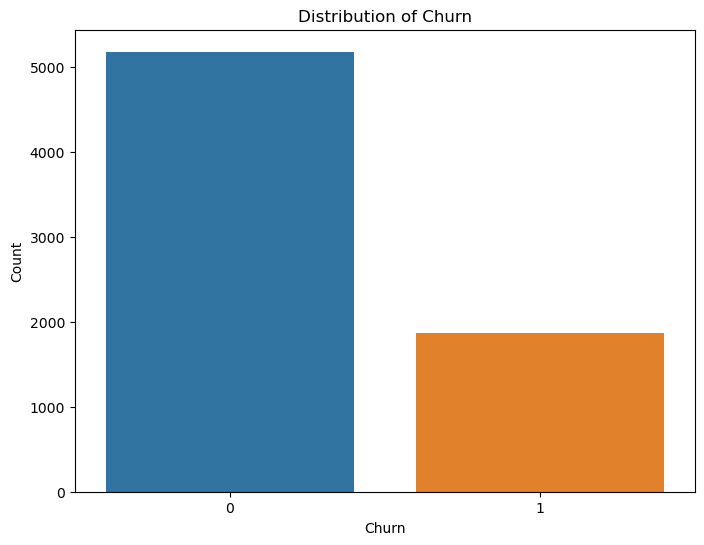

In [87]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#### Distribution of Numeric Features


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


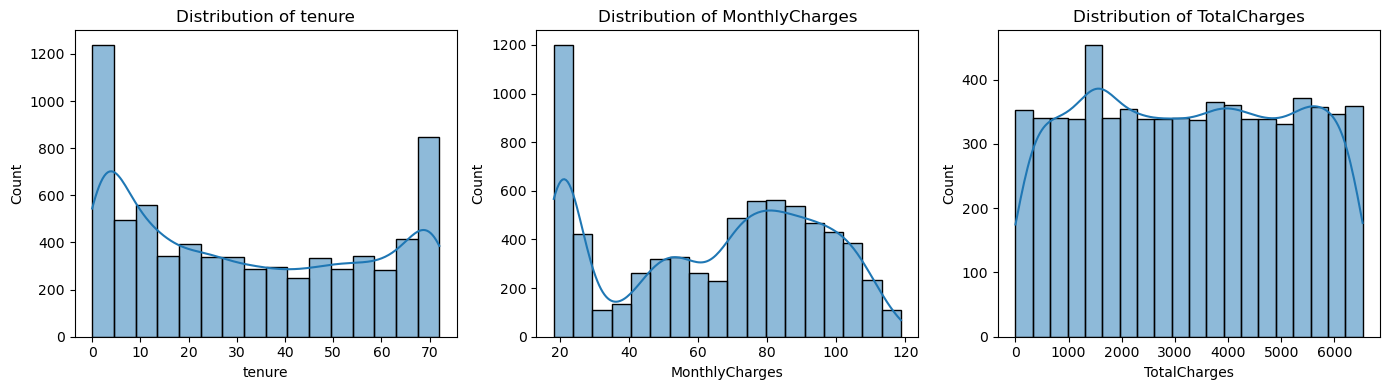

In [88]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(14, 4))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

#### Churn by Tenure


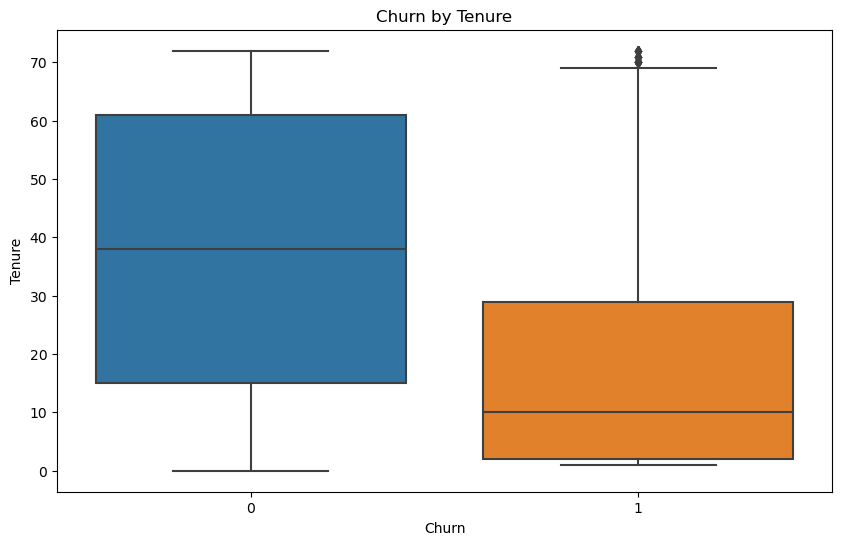

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn by Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

#### Monthly Charges vs. Total Charges


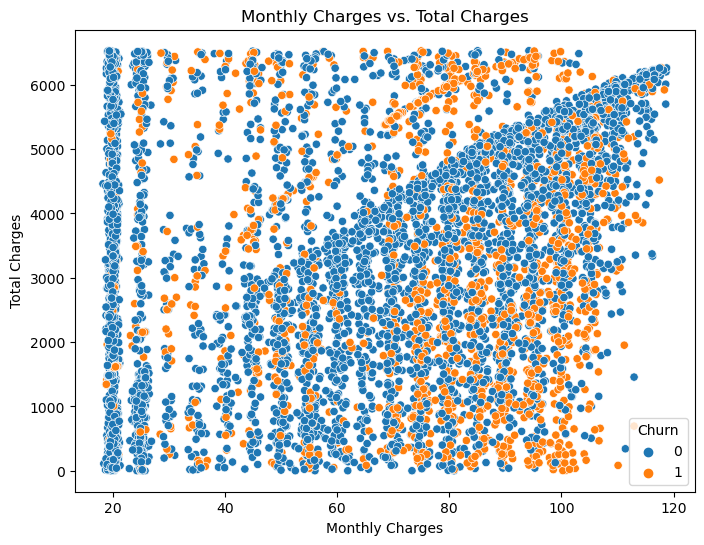

In [90]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


#### Churn by Gender


<Figure size 800x600 with 0 Axes>

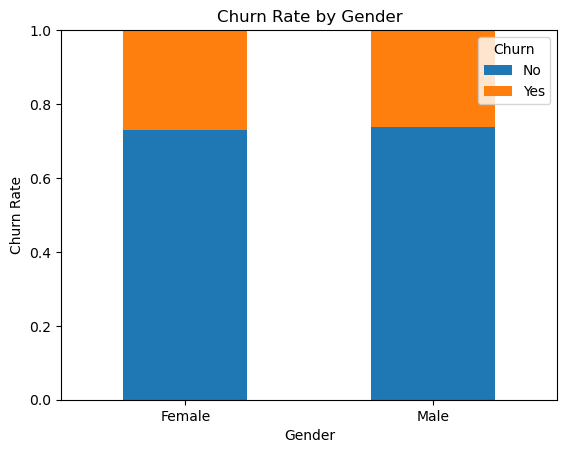

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by gender and churn status, and calculate churn count
churn_count_by_gender = df.groupby(['gender', 'Churn']).size().unstack()

# Calculate churn rate for each gender
churn_rate_by_gender = churn_count_by_gender.div(churn_count_by_gender.sum(axis=1), axis=0)

# Map numeric gender values to categorical labels
gender_mapping = {0: 'Female', 1: 'Male'}
churn_rate_by_gender.index = churn_rate_by_gender.index.map(gender_mapping)

# Plot churn rate by gender
plt.figure(figsize=(8, 6))
churn_rate_by_gender.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.ylim(0, 1)  # Set y-axis limit to show churn rate between 0 and 1
plt.show()


## 5. Model Training:


#### Split the data into training and testing sets:


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Training Classification Models


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Initializing the Models
logistic_model = LogisticRegression()
decision_model = DecisionTreeClassifier()
neighbor_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# List of additional models
models = {
    'Random Forest': rf_model,
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_model,
    'K-Neighbors': neighbor_model
}

# Initialize dictionaries to store metrics
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}

#### Train and evaluate models


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store metrics in dictionaries
    accuracy_dict[name] = accuracy
    precision_dict[name] = precision
    recall_dict[name] = recall
    f1_dict[name] = f1

     # Print metrics for each model
    print(f'--- {name} Metrics ---')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('-----------------------')

--- Random Forest Metrics ---
Accuracy: 0.7955997161107168
Precision: 0.660377358490566
Recall: 0.4691689008042895
F1 Score: 0.54858934169279
-----------------------
--- Logistic Regression Metrics ---
Accuracy: 0.8161816891412349
Precision: 0.685064935064935
Recall: 0.5656836461126006
F1 Score: 0.6196769456681351
-----------------------
--- Decision Tree Metrics ---
Accuracy: 0.7224982256919801
Precision: 0.4744318181818182
Recall: 0.4477211796246649
F1 Score: 0.46068965517241384
-----------------------


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- K-Neighbors Metrics ---
Accuracy: 0.7572746628814763
Precision: 0.5555555555555556
Recall: 0.4155495978552279
F1 Score: 0.4754601226993865
-----------------------


#### Compare results


In [96]:
print('\n--- Comparison of Model Performance ---')
print('Accuracy:')
for name, accuracy in accuracy_dict.items():
    print(f'{name}: {accuracy}')
    
print('\nPrecision:')
for name, precision in precision_dict.items():
    print(f'{name}: {precision}')
    
print('\nRecall:')
for name, recall in recall_dict.items():
    print(f'{name}: {recall}')
    
print('\nF1 Score:')
for name, f1 in f1_dict.items():
    print(f'{name}: {f1}')


--- Comparison of Model Performance ---
Accuracy:
Random Forest: 0.7955997161107168
Logistic Regression: 0.8161816891412349
Decision Tree: 0.7310149041873669
K-Neighbors: 0.7572746628814763

Precision:
Random Forest: 0.660377358490566
Logistic Regression: 0.685064935064935
Decision Tree: 0.4915254237288136
K-Neighbors: 0.5555555555555556

Recall:
Random Forest: 0.4691689008042895
Logistic Regression: 0.5656836461126006
Decision Tree: 0.46648793565683644
K-Neighbors: 0.4155495978552279

F1 Score:
Random Forest: 0.54858934169279
Logistic Regression: 0.6196769456681351
Decision Tree: 0.4786795048143054
K-Neighbors: 0.4754601226993865
